# Mario

# Setup Mario Environment

In [83]:
# Import the joypad wrappers
from nes_py.wrappers import JoypadSpace
# Import the game
import gym_super_mario_bros
# Import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [84]:
# Simplfy the movement of Mario using SIMPLE_Movement
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [85]:
# Setup the environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [86]:
# To see what the environment looks like
env.observation_space.shape  # 240 pixels by 256 pixels in 3 colors channels, which represents the frame of the game

(240, 256, 3)

In [87]:
# Randomly test the environment
done = True 
# Loop through 100000 steps (each frame in the game)
for step in range(100):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game
    env.render()
# close the environment
env.close()


# Preprocessing Environment

In [88]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, SubprocVecEnv, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [89]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [90]:

# Gray-scale and down-sample in order to reduce the computation time for the Reinforcement Learning model
env = GrayScaleObservation(env, keep_dim=True) # Color channels will become 1

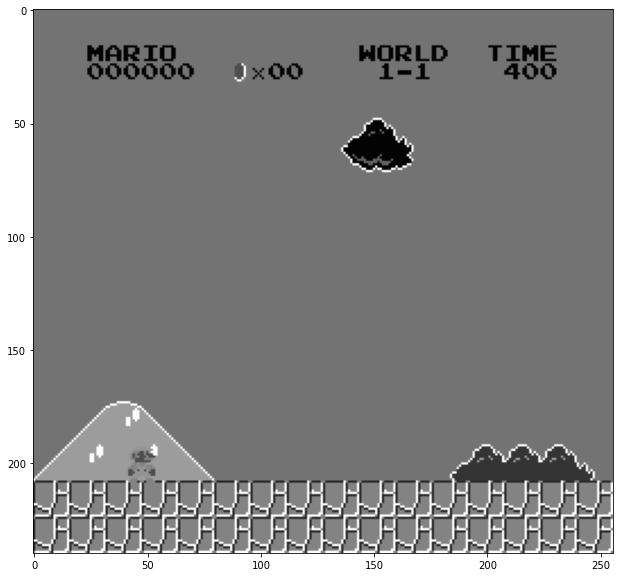

In [99]:
state = env.reset()

plt.figure(figsize=(15,10))
plt.imshow(state[0])

In [92]:
state = env.reset()
state.shape

(240, 256, 1)

So we jump from 240*256*3 = 184320 bits to 240*256*1 = 61440 bits!

In [93]:
# warp inside the Dummy Enivornment

env = DummyVecEnv([lambda: env])


In [94]:

# Stack frames this will give the agent some kind of memory
env = VecFrameStack(env, n_stack=4, channels_order= 'last') # Stack 4 consecutive frames together to give the agent a sense of motion

In [95]:
state = env.reset()

In [107]:
state, reward, done, info = env.step([env.action_space.sample()])

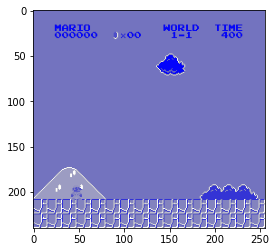

In [97]:
plt.imshow(state[0])

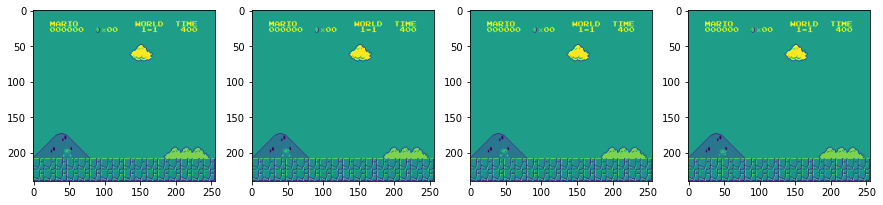

In [108]:
# Note run state, reward, done, info = env.step([env.action_space.sample()])
# Four times to get the visulaization of four steps in the environment
plt.figure(figsize=(15,10))
for idx in  range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:, :, idx])
plt.show()

## Training The Model

In [ ]:
# Import os for file path management
import os
# Import PPO Reinforcement algorithm
import sta


# 